In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [198]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [199]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [200]:
r,c = df.shape

print(f"This dataset contains {r} rows and {c} columns")

This dataset contains 7043 rows and 21 columns


### **Data Cleaning**

In [201]:
df.duplicated().sum()

0

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [203]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


- This dataset have no null value and no duplicate value

In [204]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [205]:
# customer id is not important
df = df.drop(["customerID"], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [206]:
# gender column

df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [207]:
# SeniorCitizen column
df["SeniorCitizen"].unique()

array([0, 1])

In [208]:
# Pertner column
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [209]:
# Dependents column
df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [210]:
# tenure column
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [211]:
df["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [212]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [213]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [214]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [215]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [216]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [217]:
df["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [218]:
df["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [219]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [220]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [221]:
df["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [222]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [223]:
df["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [224]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [225]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

## **Removing Outliers**

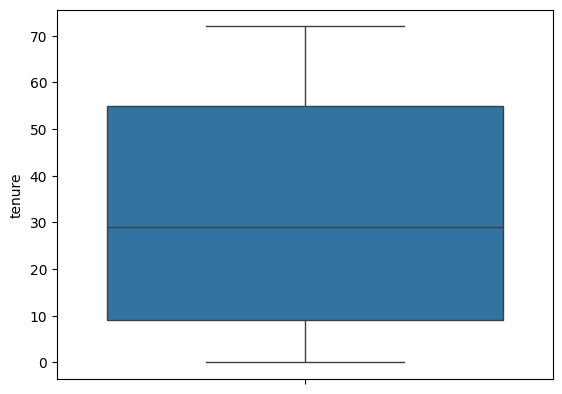

In [226]:
sns.boxplot(df["tenure"])
plt.show()

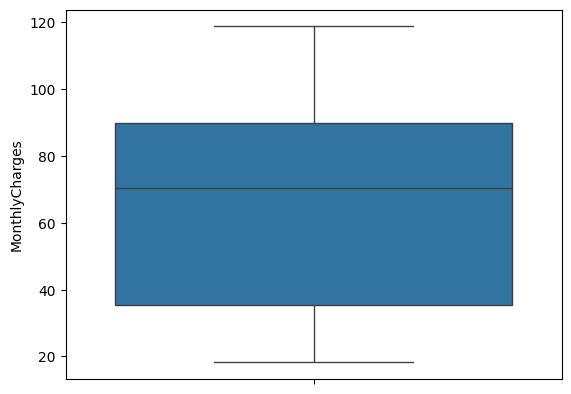

In [227]:
sns.boxplot(df["MonthlyCharges"])
plt.show()

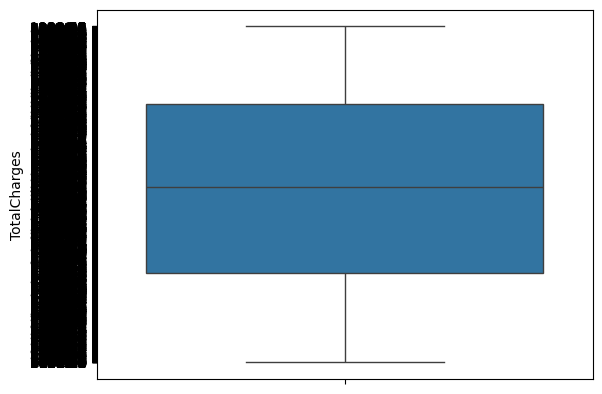

In [228]:
sns.boxplot(df["TotalCharges"])
plt.show()


### There is no outlier

## **DataPreprocessing**

In [229]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [230]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [231]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scalar = StandardScaler()
df[["tenure"]] = scalar.fit_transform(df[["tenure"]])
df[["MonthlyCharges"]] = scalar.fit_transform(df[["MonthlyCharges"]])
df[["TotalCharges"]] = scalar.fit_transform(df[["TotalCharges"]])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,-1.277445,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994194,No
1,Male,0,No,No,0.066327,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.173740,No
2,Male,0,No,No,-1.236724,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.959649,Yes
3,Male,0,No,No,0.514251,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.195248,No
4,Female,0,No,No,-1.236724,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.940457,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,-0.340876,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.665992,-0.129180,No
7039,Female,0,Yes,Yes,1.613701,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),1.277533,2.241056,No
7040,Female,0,Yes,Yes,-0.870241,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,-1.168632,-0.854514,No
7041,Male,1,Yes,No,-1.155283,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.320338,-0.872095,Yes


In [232]:
le = LabelEncoder()

df["gender"] = le.fit_transform(df["gender"])
df["Partner"] = le.fit_transform(df["Partner"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["PhoneService"] = le.fit_transform(df["PhoneService"])
df["MultipleLines"] = le.fit_transform(df["MultipleLines"])
df["InternetService"] = le.fit_transform(df["InternetService"])
df["OnlineBackup"] = le.fit_transform(df["OnlineBackup"])
df["OnlineSecurity"] = le.fit_transform(df["OnlineSecurity"])
df["DeviceProtection"] = le.fit_transform(df["DeviceProtection"])
df["TechSupport"] = le.fit_transform(df["TechSupport"])
df["StreamingTV"] = le.fit_transform(df["StreamingTV"])
df["StreamingMovies"] = le.fit_transform(df["StreamingMovies"])
df["Contract"] = le.fit_transform(df["Contract"])
df["PaperlessBilling"] = le.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"] = le.fit_transform(df["PaymentMethod"])
df["Churn"] = le.fit_transform(df["Churn"])

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994194,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173740,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959649,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195248,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.129180,0
7039,0,0,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.241056,0
7040,0,0,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.854514,0
7041,1,1,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.872095,1


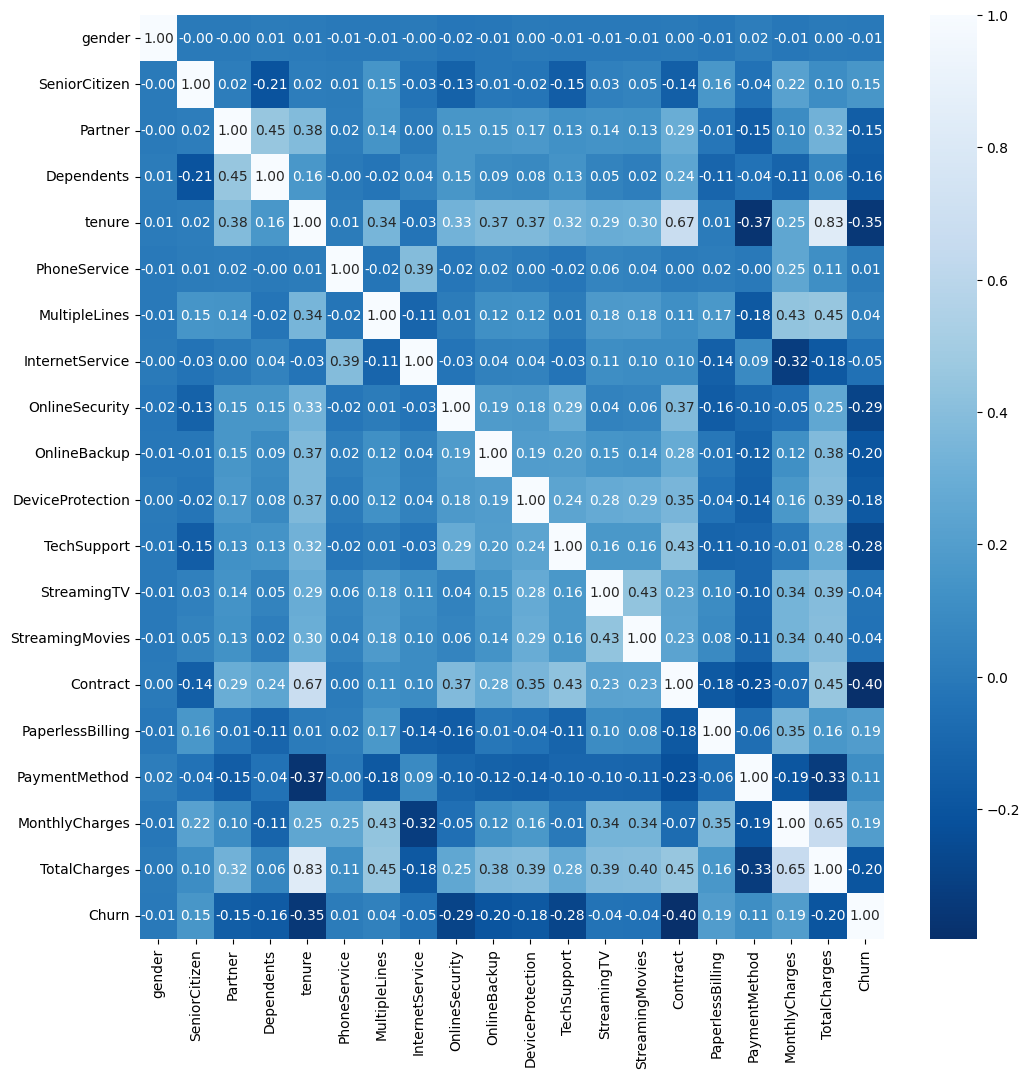

In [233]:
# find correlation between columns
plt.figure(figsize=(12, 12))
sns.heatmap(data=df.corr(), annot=True, cmap="Blues_r", fmt = ".2f")
plt.show()

### Gender, PhoneService, MultipleLines, InternetServtice, StreamingTV, StreamingMovies are less correlated with Churn Column

In [234]:
df.drop(["gender", "PhoneService", "MultipleLines", "InternetService", "StreamingTV", "StreamingMovies"], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   float64
 4   OnlineSecurity    7043 non-null   int64  
 5   OnlineBackup      7043 non-null   int64  
 6   DeviceProtection  7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   Contract          7043 non-null   int64  
 9   PaperlessBilling  7043 non-null   int64  
 10  PaymentMethod     7043 non-null   int64  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7032 non-null   float64
 13  Churn             7043 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 770.5 KB


In [235]:
X = df.drop(["Churn"], axis = 1)
Y = df["Churn"]

X

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,-1.277445,0,2,0,0,0,1,2,-1.160323,-0.994194
1,0,0,0,0.066327,2,0,2,0,1,0,3,-0.259629,-0.173740
2,0,0,0,-1.236724,2,2,0,0,0,1,3,-0.362660,-0.959649
3,0,0,0,0.514251,2,0,2,2,1,0,0,-0.746535,-0.195248
4,0,0,0,-1.236724,0,0,0,0,0,1,2,0.197365,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,-0.340876,2,0,2,2,1,1,3,0.665992,-0.129180
7039,0,1,1,1.613701,0,2,2,0,1,1,1,1.277533,2.241056
7040,0,1,1,-0.870241,2,0,0,0,0,1,2,-1.168632,-0.854514
7041,1,1,0,-1.155283,0,0,0,0,0,1,3,0.320338,-0.872095


In [236]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)


## **ANN Model**

In [237]:
from tensorflow.keras import layers, models

In [238]:
ann_model = models.Sequential([
      layers.Dense(7000, input_dim=X_train.shape[1], activation='relu'),
      layers.Dense(700, activation = "relu"),
      layers.Dense(1, activation='sigmoid')
])

In [239]:
ann_model.compile(optimizer= "adam", loss = "mean_squared_error", metrics=["accuracy"])

In [245]:
history = ann_model.fit(
    X_train,
    Y_train,
    epochs = 5,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/5
141/141 [==============================] - 11s 81ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 2/5
141/141 [==============================] - 11s 79ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 3/5
141/141 [==============================] - 11s 75ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 4/5
141/141 [==============================] - 11s 75ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 5/5
141/141 [==============================] - 11s 79ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507


In [192]:
test_loss, test_acc = ann_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

56/56 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7280
Test accuracy: 0.7279954552650452


In [247]:
ann_model.save("/content/churn_classifier.h5")